# KMeans clustering

In [ ]:
import pandas as pd
import os
import glob
import numpy as np
%pylab inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'])

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/gdrive/My Drive/Neoliber_2020.csv")
df.head()

,Unnamed: 0,author,body,date,title,url,year,month,day
0,0.0,Matt Kilcoyne,With the release of the details of the make-up...,2020-05-04,WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHE...,https://www.adamsmith.org/news/whither-the-eco...,2020.0,5.0,4.0
1,1.0,Madsen Pirie,Cost-benefit analysis is a useful tool for wor...,2020-05-10,WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COV...,https://www.adamsmith.org/blog/were-missing-co...,2020.0,5.0,10.0
2,2.0,Dr Smith,I have been asked how medicine is practised di...,2020-04-29,MEDICINE DURING COVID,https://www.adamsmith.org/despatches/medicine-...,2020.0,4.0,29.0
3,3.0,Lance Forman,The Government is going about supporting the e...,2020-03-19,COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AN...,https://www.adamsmith.org/blog/covid19-how-do-...,2020.0,3.0,19.0
4,4.0,Eamonn Butler,"Too late now, but I think I understand why min...",2020-04-27,WHY THE POLICE GOT IT SO WRONG ON ENFORCING CO...,https://www.adamsmith.org/blog/why-the-police-...,2020.0,4.0,27.0


In [ ]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
#filenames = glob.glob("congressional_record/*.txt")

# Maybe use open(filename, encoding='latin-1').read()
# if you're running into trouble
#contents = [open(filename, encoding='latin-1').read() for filename in filenames]

#df = pd.DataFrame({'text': contents,'filenames': filenames})
df.head(30)

,author,body,date,title,url,year,month,day
0,Matt Kilcoyne,With the release of the details of the make-up...,2020-05-04,WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHE...,https://www.adamsmith.org/news/whither-the-eco...,2020.0,5.0,4.0
1,Madsen Pirie,Cost-benefit analysis is a useful tool for wor...,2020-05-10,WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COV...,https://www.adamsmith.org/blog/were-missing-co...,2020.0,5.0,10.0
2,Dr Smith,I have been asked how medicine is practised di...,2020-04-29,MEDICINE DURING COVID,https://www.adamsmith.org/despatches/medicine-...,2020.0,4.0,29.0
3,Lance Forman,The Government is going about supporting the e...,2020-03-19,COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AN...,https://www.adamsmith.org/blog/covid19-how-do-...,2020.0,3.0,19.0
4,Eamonn Butler,"Too late now, but I think I understand why min...",2020-04-27,WHY THE POLICE GOT IT SO WRONG ON ENFORCING CO...,https://www.adamsmith.org/blog/why-the-police-...,2020.0,4.0,27.0
5,John Macdonald,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,As the UK faces increasingly severe lockdown m...,2020-03-26,COVID-19 AND GAME THEORY,https://www.adamsmith.org/blog/covid-19-and-ga...,2020,3.0,26.0,NaN
7,Madsen Pirie,"When the Eiffel Tower was erected in 1889, it ...",2020-05-06,NOTHING IS EVER AS PERMANENT AS A TEMPORARY GO...,https://www.adamsmith.org/blog/nothing-is-ever...,2020.0,5.0,6.0
8,Matthew Lesh,"The Adam Smith Institute, who today released a...",2020-04-02,ASI WELCOMES HANCOCK COVID-19 TESTING PLAN,https://www.adamsmith.org/news/asi-welcomes-ha...,2020.0,4.0,2.0
9,Dr Smith,Coronavirus is resetting the balance of risk a...,2020-05-10,COVID HAS CHANGED HOW WE DO RESEARCH,https://www.adamsmith.org/despatches/covid-has...,2020.0,5.0,10.0


In [ ]:
df.drop

<bound method DataFrame.drop of               author  ...   day
0      Matt Kilcoyne  ...   4.0
1       Madsen Pirie  ...  10.0
2           Dr Smith  ...  29.0
3       Lance Forman  ...  19.0
4      Eamonn Butler  ...  27.0
..               ...  ...   ...
781  Andrew  McIndoe  ...  15.0
782    Tommy  Binion  ...  13.0
783     Kay C. James  ...  22.0
784  Kevin  Pham, MD  ...  26.0
785  Kevin  Pham, MD  ...   5.0

[786 rows x 8 columns]>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
import re

In [ ]:
punctL = list(set(string.punctuation))

punctL.append('«')
punctL.append('’')
punctL.append('»')
punctL.append('–')
punctL

['$',
 '_',
 '@',
 '=',
 '}',
 '~',
 '|',
 '%',
 '!',
 '*',
 ']',
 '"',
 ';',
 '+',
 '#',
 ':',
 '.',
 '[',
 '/',
 '<',
 ')',
 '`',
 '^',
 '(',
 '-',
 '?',
 ',',
 '{',
 '\\',
 "'",
 '&',
 '>',
 '«',
 '’',
 '»',
 '–']

In [ ]:
#Καθαρισμός κειμένου
import string
def clean_text(body):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", body.lower())
    return re.sub(r'\W+', ' ', clean1)

df.body = [str (item) for item in df.body]

df.body = df.body.map(lambda x: clean_text(x)) #tokenazation

In [ ]:
df.body

0      with the release of the details of the makeup ...
1      costbenefit analysis is a useful tool for work...
2      i have been asked how medicine is practised di...
3      the government is going about supporting the e...
4      too late now but i think i understand why mini...
                             ...                        
781    our most memorable heroes are forged through c...
782    the news has been full of stories on scotus no...
783    when the nongovernmental national coronavirus ...
784    americas coronavirus testing rates have emerge...
785    the centers for disease control and prevention...
Name: body, Length: 786, dtype: object

In [ ]:
#def clean_text(text):
    # tokenize text and remove puncutation
    #text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove stop words
    #text = [x for x in text if x not in sw]
    # lower text
    #text = [remove_ton(x) for x in text]
    #remove quotes
    #text = [x.replace('quot;','').replace('&quot','') for x in text if x not in ['quot','amp']]
    # remove words that contain numbers
    #text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove empty tokens
    #text = [t for t in text if len(t) > 0]
    # remove amp & quot
    #text = [x for x in text if x not in ['quot','amp']]
    # remove words with only one letter
    #text = " ".join([t for t in text if len(t) > 1])
    # lemmatize text
    #text = " ".join([(t.lemma_) for t in nlp(text)])
    #return(text)

## Vectorize the documents

What are the options when creating a `TfidfVectorizer`?

Let's think about:
* **ngram_range: Do we just want single words? Or more? (1,2) is one- and two-word phrases, etc.
* **max_features**: Can it make things faster? `1` and up
* **max_df**: Should we ignore words that show up too often? `0.0`-`1.0` for percent, OR an integer for absolute document counts
* **min_df**: Should we ignore words that show up too little? `0.0`-`1.0` for percent, OR an integer for absolute document counts
* **vocabulary**: Only care about certain words

Also... how many documents do we have?

In [ ]:
df.shape

(786, 8)

In [ ]:
df['body'][4]

'too late now but i think i understand why ministers and the police got into such trouble about social distancing police as you recall hassled people sunbathing in the park rebuked a man for sitting in his own front garden and lectured us not to buy nonessential items whatever that means meanwhile the health secretary to say exactly how long people could drive in order to take exercise bizarrely suggested an arbitrary five minutes whats happened is that over the last 40 years the british legal system has been overlaid with continental law here the test of an action was whether or not it was reasonable the law accepted that life was complex and left judges to decide each specific case the continental tradition by contrast specifies precise rules that apply in all cases hence those journalists pressing ministers to say exactly what the rules are ministers struggling to make up new rules on the hoof and police enforcing things to the letter not the spirit while the great british public ju

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['below',
 'them',
 'indeed',
 'ten',
 'could',
 'few',
 'it',
 'none',
 'hereafter',
 'any',
 'seemed',
 'unless',
 'these',
 'which',
 'her',
 'ourselves',
 'whence',
 'be',
 'alone',
 'without']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words)
X = vectorizer.fit_transform(df.body)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
##TF - IDF EXAMPLE

In [ ]:
#print(vectorizer.get_feature_names())
#print(X.shape)

In [ ]:
#print(X)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
Neoliber_cl=pd.DataFrame(list(zip(df.body,labels)),columns=['title','cluster'])
print(Neoliber_cl.sort_values(by=['cluster']))

                                                 title  cluster
392  ever had a major expense pop up perhaps your c...        0
236  boris johnsons speech and the eus draft negoti...        0
640  the countries of latin america so far have esc...        0
239  following the dawn of a new decade a flurry of...        0
248  one of the larger benefits those of a liberal ...        0
..                                                 ...      ...
664  for quite some time china has been trying to u...        9
660  last year the worlds fifth leastdeveloped coun...        9
656  this past week the us state department ordered...        9
411  the daily signal last month revealed links bet...        9
158  covid 19 has done more than cause a medical an...        9

[786 rows x 2 columns]


Cluster: 0
Titles
 today the geneva network is launching its decl...
 the adam smith institutes latest paper by aust...
 last week the fraser institute a canadian thin...
 if youve heard of the long running trade dispu...
 in april the world trade organisation wto publ...
  continued from part 1 no discussion of global...
 the progress that free trade and globalisation...
 today marks the 155th anniversary of the death...
 trade has lifted billions of people out of pov...
 as fidel castro progressed slowly toward havan...
 boris johnsons speech and the eus draft negoti...
 following the dawn of a new decade a flurry of...
 one of the larger benefits those of a liberal ...
  the mission of network for a free society is ...
 last week the fraser institute a canadian thin...
 the trade balance is calculated as the differe...
 over the past couple months we at catos trade ...
 anyone who grew up in canada outside of quebec...
 president trump has touted the north american ...
 the world tr

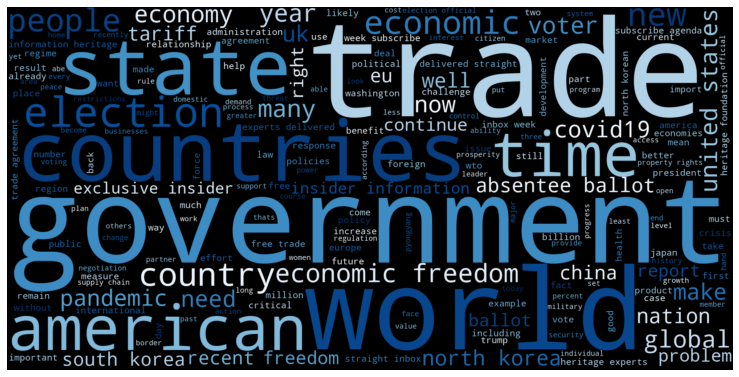

Cluster: 1
Titles
 its rather worrying when a major newspaper can...
 although teachers pay has slipped back in rece...
 many people are increasingly worried about the...
 the idea behind education vouchers has solid a...
 its basic government must not discriminate for...
 as youd expect with the arrival of a new schoo...
 tomorrow the us supreme court will hear oral a...
 even in terrific economic times we hear the dr...
 i recently read democracys schools the rise of...
 harvard university recently announced it has a...
 when covid19 brought the school year to an abr...
 if you wanted to determine tomorrow if your ch...
 in march public school shutdowns in response t...
 as parents face a second wave of large scale l...
 vaccines may not be the silver bullets we hope...
 in the fight against coronavirus 33 states hav...
 july is typically a busy month for state depar...
 access to education is foundational to america...
 at what would normally be the end of the first...
 americans ar

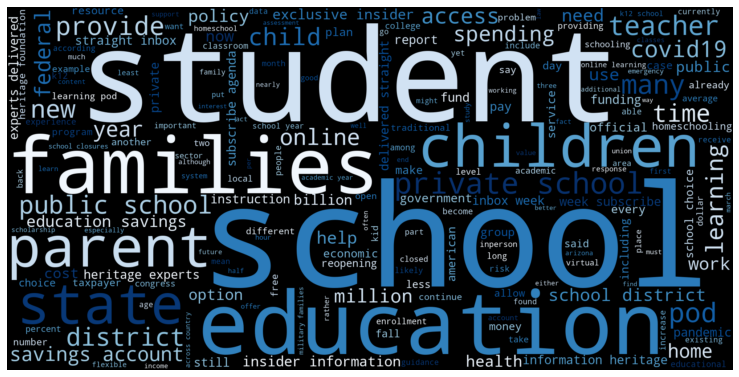

Cluster: 2
Titles
 the adam smith institute who today released a ...
 the asis latest paper written by asi head of r...
 a new report by the adam smith institutes argu...
 this past week saw emails about the availabili...
 the asis latest paper authored by georgetown u...
 antibody testing is probably still the number ...
 many of us working in nhs hospitals welcomed t...
 this world blood donor day 14 june 2020 a new ...
 in 2019 fearing it was likely that the world w...
 rejoice citizens for in the peoples republic o...
 this past week testing for covid19 or the lack...
 the hospital at which i work offered antibody ...
 i and others have attributed much of the initi...
 the food and drug administrations cumbersome a...
 the shortage of tests for diagnosing covid19 l...
 the pandemic is again raging in italy where st...
 excessive rules regulations and paperwork impe...
 the novel coronavirus disease known as covid19...
 early international media reporting on the out...
 returning to

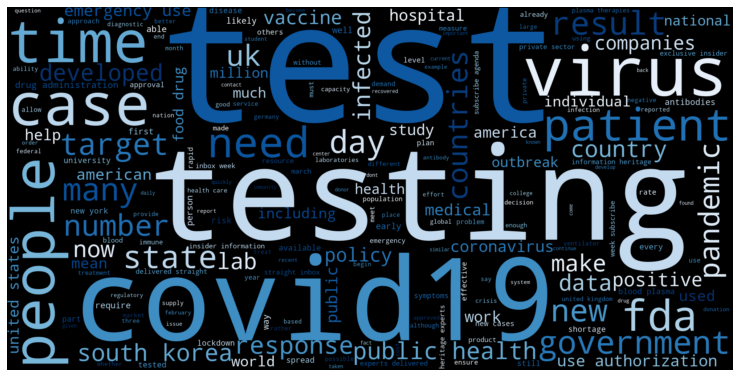

Cluster: 3
Titles
 i have been asked how medicine is practised di...
 there are are a lot of numbers bandied about e...
 just recalling the start of my ae shift this m...
 one of the striking features of the current co...
 one of the really enlightening parts of this c...
 it is great to hear about the plans to kick st...
 last weekend was a humdinger in ae it was defi...
 the media has finally picked up on the truly u...
 back a few weeks there was that interesting si...
 the number of healthcare workers dying from co...
 the financial times is attempting to pull toge...
 wow that was a quiet day started quietly then ...
 the intensive care unit is full during my late...
 this letter to the guardian could be a spoof w...
 polly toynbee is outraged outraged that people...
 of course having a near stalinist bureaucracy ...
 from spain to canada and everywhere in between...
 it is difficult seeing the prime minister bein...
 among the odd ideas the guardian presents for ...
 clearly ther

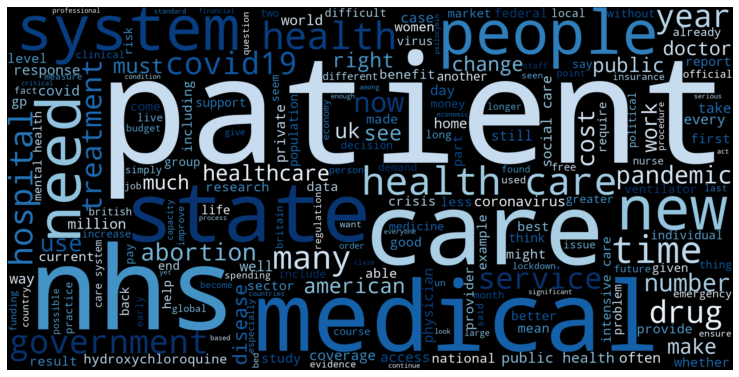

Cluster: 4
Titles
 the government is going about supporting the e...
 even precovid tax burden higher than at any ti...
 following the spending review by the chancello...
 tax freedom day is a measure of when britons s...
 the claim here is fine of course it is unions ...
 a survey in india showing that many workers su...
 the guardian has been telling us for a couple ...
 the asis latest paper authored by asi deputy d...
 there are times when the trades union congress...
 a new paper from the neoliberal think tank the...
 the adam smith institute commissioned survatio...
 the adam smith institutes latest paper by fell...
 widespread concerns about the impact of ai on ...
 the coronavirus pandemic has shone a light on ...
 this week the iea and civitas published a join...
 millions of jobs will be seen to have been los...
 three months ago the uk labour market was doin...
 as part of the transition from vircon4 lockdow...
 many key workers mainly but not exclusively in...
 economists h

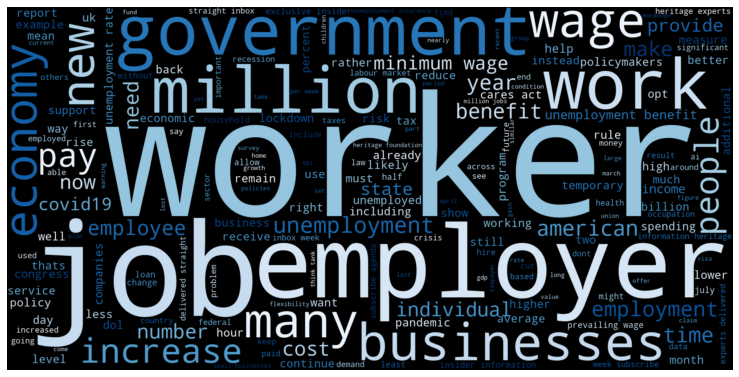

Cluster: 5
Titles
 this essay the first of a series on government...
 at the guardian david ferguson criticizes call...
 the us postal service is approaching bankruptc...
 postmaster general louis dejoy has faced withe...
 taking the helm of a major organization is alw...
 if you followed only the headlines and mainstr...
 a stream of apocalyptic predictions and strain...
 the lawsuit filed last week by new york state ...
 in 2020 were used to seeing falsehoods and mis...


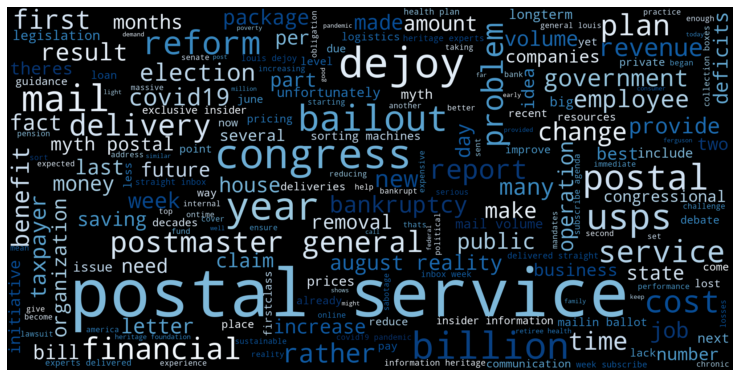

Cluster: 6
Titles
 imagine if you were handed a bill amounting to...
 despatches is a new blog from the adam smith i...
 the conservative that is not conservative revo...
 just over 30 years after the collapse of socia...
 in august 1989 polands parliament did the unth...
 on 15 september 2020 the adam smith institute ...
 a common misunderstanding about wokeness is th...
 the bbc has come under severe criticism recent...
 there is no doubt that california is in a big ...
 one of the frustrating things about being an e...
 in 1999 the blair government set an official t...
 yes says kristian niemietz the dementia tax wh...
 imagine a country with a dictatorial governmen...
 interestingly pope francis has talked about di...
 milton friedman once said that only government...
 yes says dr stephen davies there is a big deba...
 in the runup to his big speech all the talk wa...
 in the early stages of the lockdown james kirk...
 pension autoenrolment was one of the early sig...
 in a recent 

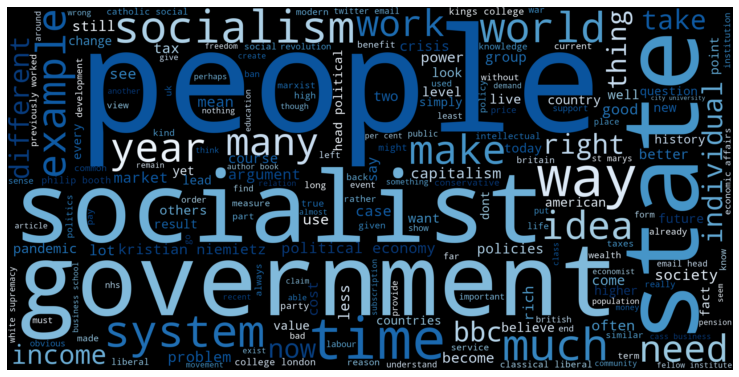

Cluster: 7
Titles
 with the release of the details of the makeup ...
 costbenefit analysis is a useful tool for work...
 too late now but i think i understand why mini...
                                               nan
                                          20200326
 when the eiffel tower was erected in 1889 it w...
 coronavirus is resetting the balance of risk a...
 imagine a farmer with a field of wheat the far...
 theres a certain logical confusion on display ...
 today the department of health and social care...
 matthew lesh spoke to the sun and explained ou...
 the dawn of the 2020s has not gone as most had...
 the observer tells us that this modern world o...
 following the utterly tonedeaf timing of the g...
 the insistence that we should all go do someth...
 even baldrick knew that you actually had to ha...
 most people think that knowledge is solid and ...
 in 1989 englands governmentrun water utility w...
 i had the huge fortune to speak with a lady in...
 polly toynbe

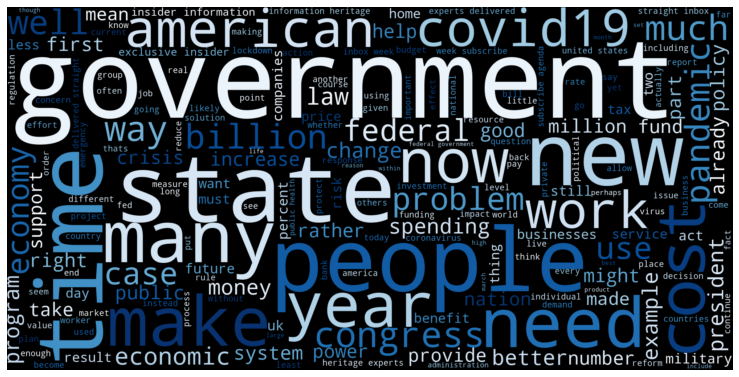

Cluster: 8
Titles
 i recently had a really interesting conversati...
 the governments response to the covid pandemic...
 we all agree that lockdown should only be ease...
 as the government has said its strategy on cov...
 many people wonder whether the aim of flatteni...
 the government claims that lockdown exit will ...
 in late march most african states copied the a...
 there are features of our way of life and some...
 the government has said it will do whatever it...
 the proposal to isolate those aged 70 for four...
 on the ghoulishly appropriate date of 31 octob...
 im a bit of a covid19 hawk myself being expose...
 last week i pointed out a recent report that b...
  closely watched and scrutinized projections b...
 when covid19 first reached america nearly a ye...
 florida is melting down or is it while the sta...
 when president donald trump announced the 15 d...
  i just want to make it clear to the american ...
 one of the biggest unknowns of the covid19 pan...
 dr david nab

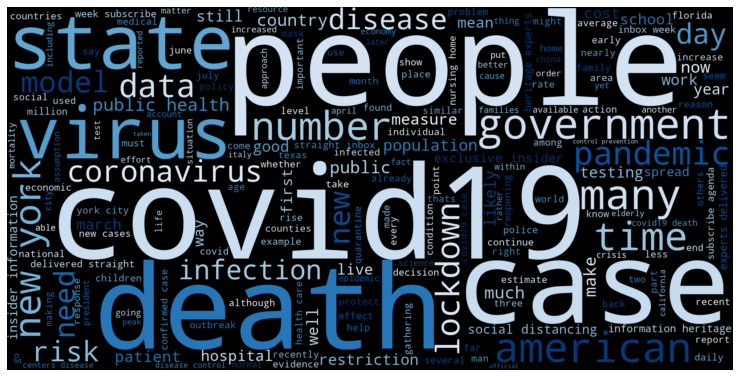

Cluster: 9
Titles
 covid 19 has done more than cause a medical an...
 although the coronavirus scare has dampened th...
 as the world entered the turbulent 1960s two m...
 as world war ii drew to a close few visitors t...
 yesterday president trump invoked his authorit...
 yesterday president trump and chinese vice pre...
 the uschina economic and trade agreement descr...
 the us department of state announced a new rul...
 the chinese governments crackdown on dissident...
 it is increasingly common for politicians and ...
 mounting evidence shows that china has enacted...
 in the midst of the coronavirus pandemic the p...
 lets be realistic no consensus exists on the f...
 the worstcase scenario is knocking at hong kon...
 the daily signal last month revealed links bet...
 last week president donald trump announced the...
 as if 2020 has not been sufficiently crisislad...
 youve heard of the uschina trade war but have ...
 that china an irresponsible global actor trigg...
 secretary of

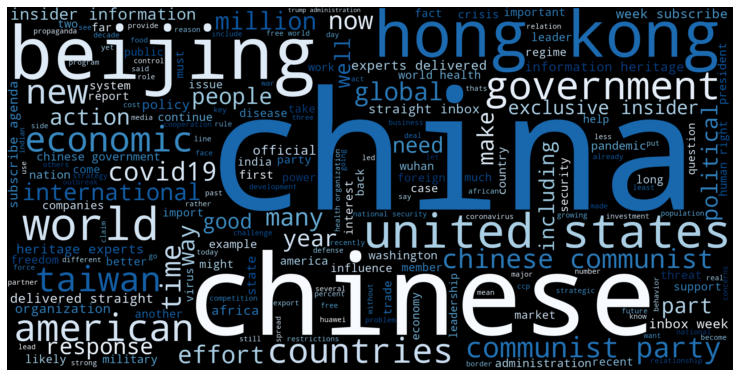

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stop_words = ['from', 'will', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'] + list(STOPWORDS)
result={'cluster':labels,'Neoliber':df.body}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['Neoliber'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(stopwords = stop_words, width = 2000, height = 1000, background_color="black", colormap = "Blues").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles = Neoliber_cl[Neoliber_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure(figsize=(13,13))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
Neoliber_cl.sort_values(by=['cluster'])

,title,cluster
392,ever had a major expense pop up perhaps your c...,0
236,boris johnsons speech and the eus draft negoti...,0
640,the countries of latin america so far have esc...,0
239,following the dawn of a new decade a flurry of...,0
248,one of the larger benefits those of a liberal ...,0
...,...,...
664,for quite some time china has been trying to u...,9
660,last year the worlds fifth leastdeveloped coun...,9
656,this past week the us state department ordered...,9
411,the daily signal last month revealed links bet...,9
